# p4: Obtención de datos e importación de librerías:
Accedemos a Kaggle.com. Encontrando el dataset de pistas de Spotify, y eligiendolo, este tiene 35 atributos y 404939 instancias.


Importamos numpy para creación de vectores y matrices multidimensionales grandes.

Importamos Pandas para manipular y analizar datos a traves de DataFrames.

Importamos Seaborn para visualizar datos y realizar gráficos.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


Importamos matplotlib y especificamente .pyplot para graficar y mostrar estos graficos en el notebook. Usaremos .colors en KNN

In [3]:
import matplotlib
import matplotlib.pyplot as plt


Usaremos stats de scipy para eliminación de outliers

In [4]:
from scipy import stats


modificamos los colores de sns también, puramente estilístico.

In [5]:
sns.set_theme(style="darkgrid", palette="muted")


StandardScaler se usa para normalizar, escalando a la varianza unitaria.
MultiLabelBinarizer se usa para convertir múltiples etiquetas en un formato binario, lo que permite trabajar con problemas de clasificación multietiqueta.


In [6]:
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
mlb = MultiLabelBinarizer()
scaler = StandardScaler()


importamos el algoritmo KNN usando KNeighborsRegressor, porque trabaja con valores continuos

In [7]:
from sklearn.neighbors import KNeighborsRegressor

Usamos DecisionTreeClassifier es nuestro algoritmo de Árbol de decisión

In [8]:
from sklearn.tree import DecisionTreeRegressor

Usaremos GaussianMixture para hacer clustering también, al final.

In [9]:
from sklearn.mixture import GaussianMixture

Importamos train_test_split para generar nuestros sets de entrenamiento y prueba.

In [10]:
from sklearn.model_selection import train_test_split

Usamos plot_confusion_matrix para calcular la matriz de confusión.

In [11]:
from sklearn.metrics import confusion_matrix

PCA para analizar la viabilidad de reducción de dimensionalidad

In [12]:
from sklearn.decomposition import PCA

Importamos MSE, RMSE, MAE y r^5 para analizar la precisión de nuestros modelos continuos, ya que son regresores y no clasificadores.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Importamos tabulate para generar tablas.

In [14]:
from tabulate import tabulate


Importamos tree para graficar DT

In [15]:
from sklearn import tree

____________________
# p5: Higiene de la base
Importamos y chequeamos la base de datos desde kaggle, para ver si contiene lo requerido:

In [16]:
df = pd.read_csv('bandcamp_sales.csv')
n_columns, n_rows = len(df.columns), len(df)
print("Atributos:", n_columns, "\nInstancias:", n_rows)


Atributos: 23 
Instancias: 1000000


Ahora tiramos un head, para ver que atributos hay, y también para borrar los atributos que no serán útiles para análisis, como por ejemplo el url de cada canción (transponemos para ver con más claridad los nombres de las columnas)

In [17]:
df.head().transpose()



,0,1,2,3,4
_id,1599688803.5175&//girlbanddublin.bandcamp.com/...,1599688805.27838&//maharettarecords.bandcamp.c...,1599688805.90646&//maharettarecords.bandcamp.c...,1599688806.94234&//alicesitski.bandcamp.com/al...,1599688809.07942&//linguaignota.bandcamp.com/t...
art_url,https://f4.bcbits.com/img/a0206405257_7.jpg,https://f4.bcbits.com/img/a2984241552_7.jpg,https://f4.bcbits.com/img/a3320494770_7.jpg,https://f4.bcbits.com/img/0020476345_37.jpg,https://f4.bcbits.com/img/a3428873396_7.jpg
item_type,a,a,a,p,t
utc_date,1599688803.5175,1599688805.27838,1599688805.90646,1599688806.94234,1599688809.07942
country_code,gb,fi,fi,gb,us
track_album_slug_text,NaN,NaN,NaN,NaN,NaN
country,United Kingdom,Finland,Finland,United Kingdom,United States
slug_type,a,a,a,a,t
amount_paid_fmt,$9.99,£1,£3,€10.50,$1
item_price,9.99,1.0,3.0,10.5,1.0


botamos todas las columnas que pueden ser consideradas "id", en el sentido de que tienen un valor único por instancia.

In [18]:
df = df.drop(df.columns[df.nunique() == len(df)], axis=1)

borramos otras columnas que no nos sirven para el modelamiento posterior (y country, usaremos country_code)
además botamos slug_type porque tiene la misma información que item type pero con N/A.

In [19]:
df.drop(['album_title', 'art_id', 'url', 'art_url', 'item_description', 'artist_name', 'country', 'slug_type'], axis=1, inplace=True)



buscamos cuantos valores únicos tiene cada columna con texto.

In [20]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].nunique())


item_type 4
country_code 186
track_album_slug_text 792
amount_paid_fmt 7127
currency 18
amount_over_fmt 3084
item_slug 156


decidimos que utilizaremos amount_paid_usd para precio, ya que tiene valores más estandar. por lo tanto dropeamos todas las otras columnas de valor.

In [21]:
df.head().transpose()

,0,1,2,3,4
item_type,a,a,a,p,t
utc_date,1599688803.5175,1599688805.27838,1599688805.90646,1599688806.94234,1599688809.07942
country_code,gb,fi,fi,gb,us
track_album_slug_text,NaN,NaN,NaN,NaN,NaN
amount_paid_fmt,$9.99,£1,£3,€10.50,$1
item_price,9.99,1.0,3.0,10.5,1.0
amount_paid,9.99,1.0,3.0,10.5,1.0
releases,NaN,NaN,NaN,NaN,NaN
currency,USD,GBP,GBP,EUR,USD
amount_paid_usd,9.99,1.3,3.9,12.39,1.0


In [22]:

df.drop(['amount_over_fmt', 'currency', 'package_image_id','amount_paid', 'amount_paid_fmt'], axis=1, inplace=True)

Revisamos si hay NaN y missing values en el dataset.

In [23]:
print(df.isna().sum())



item_type                     0
utc_date                      0
country_code                  0
track_album_slug_text    997763
item_price                    0
releases                 988416
amount_paid_usd               0
item_slug                978258
addl_count               978258
dtype: int64


Botamos las columnas que tienen demasiados valores nulos, ya que no nos aportan nada al modelo.

In [24]:
df.drop(['addl_count', 'item_slug', 'releases', 'track_album_slug_text'], axis=1, inplace=True)

Revisamos estadísticas descriptivas

In [25]:
df.describe()

,utc_date,item_price,amount_paid_usd
count,1.000000e+06,1000000.000000,1000000.000000
mean,1.600750e+09,15.475516,8.931315
std,6.049259e+05,121.719962,12.490078
min,1.599689e+09,0.000000,0.200000
25%,1.600237e+09,1.000000,2.000000
50%,1.600778e+09,5.000000,6.000000
75%,1.601288e+09,10.000000,11.630000
max,1.601647e+09,29760.000000,1286.260000


Utilizamos get_dummies en item_type, para pasar a numérico. Sin embargo no podemos hacer lo mismo con country_code, ya que aumentaría demasiado la dimensionalidad.
Por lo tanto, convertimos a ints usando factorize, que asigna un int diferente a cada valor único

In [26]:
df['country_code_int'] = pd.factorize(df['country_code'])[0]
df = pd.get_dummies(df, columns=['item_type'], drop_first=True)


In [27]:
df.drop(['country_code'], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   utc_date          1000000 non-null  float64
 1   item_price        1000000 non-null  float64
 2   amount_paid_usd   1000000 non-null  float64
 3   country_code_int  1000000 non-null  int64  
 4   item_type_b       1000000 non-null  bool   
 5   item_type_p       1000000 non-null  bool   
 6   item_type_t       1000000 non-null  bool   
dtypes: bool(3), float64(3), int64(1)
memory usage: 33.4 MB


graficamos nuestros datos más relevantes, para ver su distribución.

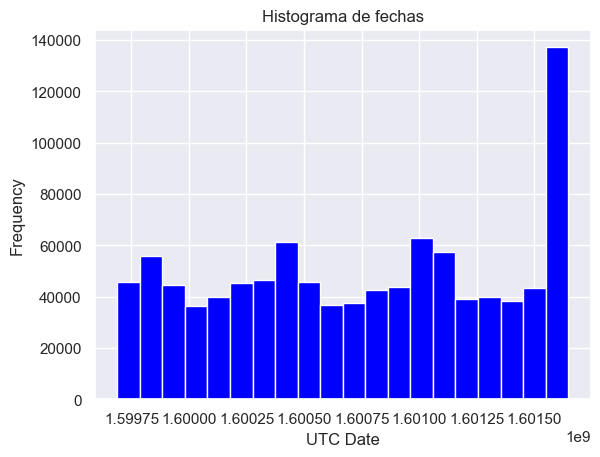

In [29]:
plt.hist(df['utc_date'], bins=20, color='blue')
plt.xlabel('UTC Date')
plt.ylabel('Frequency')
plt.title('Histograma de fechas')
plt.show()


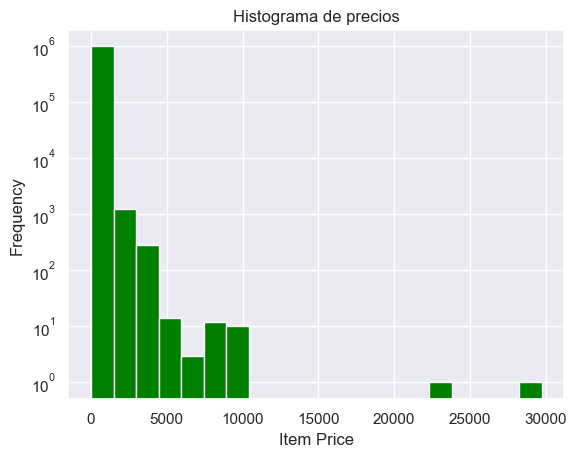

In [30]:
plt.hist(df['item_price'], bins=20, color='green', log=True)
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Histograma de precios')
plt.show()

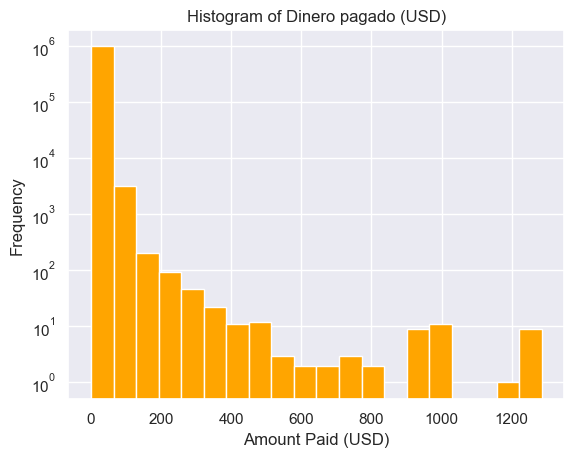

In [31]:
plt.hist(df['amount_paid_usd'], bins=20, color='orange', log=True)
plt.xlabel('Amount Paid (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Dinero pagado (USD)')
plt.show()


Claramente tenemos muchos outliers en precio, que desestabilizan la escala en precio y cantidad pagada.
______________________
# p3: Preprocesamiento para modelos
Limpiamos outliers con una mascara de Booleanos que nos deja solo las filas sin outliers. Revisamos como cambian los datos

In [32]:
z_scores = stats.zscore(df[['amount_paid_usd', 'item_price']])
outlier_mask = (np.abs(z_scores) < 25).all(axis=1)
cleaned_df = df[outlier_mask].copy()


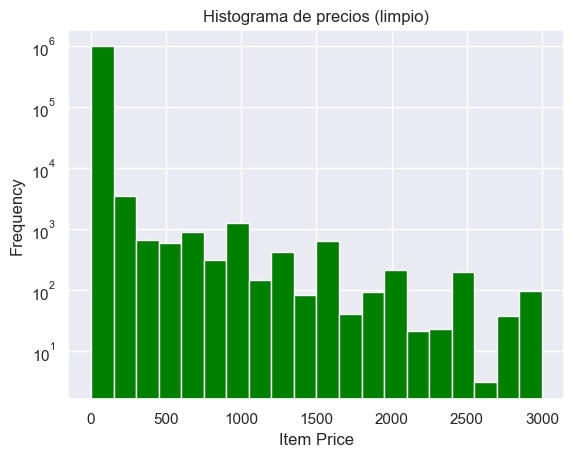

In [33]:
plt.hist(cleaned_df['item_price'], bins=20, color='green', log=True)
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Histograma de precios (limpio)')
plt.show()


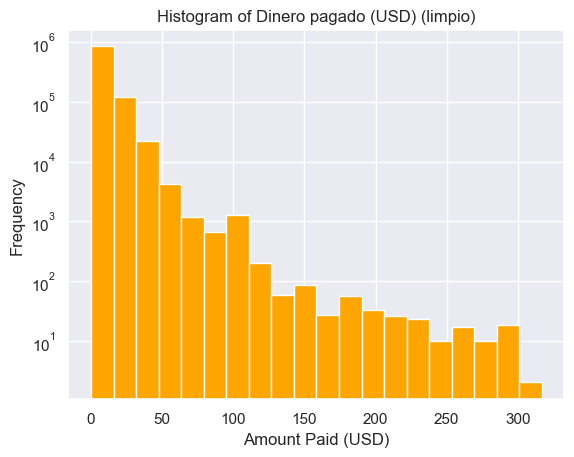

In [34]:
plt.hist(cleaned_df['amount_paid_usd'], bins=20, color='orange', log=True)
plt.xlabel('Amount Paid (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Dinero pagado (USD) (limpio)')
plt.show()


se usa StandardScaler para normalizar los datos, transformándolos para que tengan una media de cero y una desviación estándar de uno.

In [35]:
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [36]:
df_norm.describe()

,utc_date,item_price,amount_paid_usd,country_code_int,item_type_b,item_type_p,item_type_t
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,1.007738e-12,1.855760e-17,2.506795e-16,-1.506351e-18,-4.360423e-17,-9.471535e-18,-4.553158e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.753642e+00,-1.271404e-01,-6.990605e-01,-5.664620e-01,-1.082578e-01,-5.555061e-01,-6.097297e-01
25%,-8.467299e-01,-1.189248e-01,-5.549460e-01,-4.026129e-01,-1.082578e-01,-5.555061e-01,-6.097297e-01
50%,4.625825e-02,-8.606247e-02,-2.346916e-01,-4.026129e-01,-1.082578e-01,-5.555061e-01,-6.097297e-01
75%,8.907152e-01,-4.498455e-02,2.160664e-01,7.009791e-03,-1.082578e-01,-5.555061e-01,1.640071e+00
max,1.484122e+00,2.443686e+02,1.022675e+02,1.458958e+01,9.237206e+00,1.800160e+00,1.640071e+00


Revisamos cuantos componentes necesitamos para describir los datos con PCA, y así entender si vale la pena reducir dimensionalidad.

In [37]:
pca = PCA(n_components=6)
pca.fit(df_norm)


PCA(n_components=6)

Text(0, 0.5, 'cumulative explained variance')

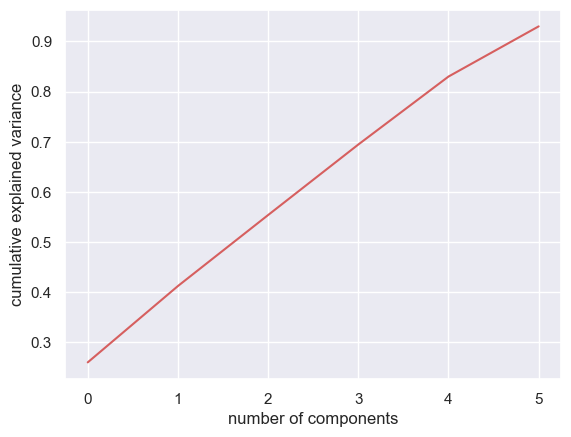

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),'r-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


No vale la pena la reducción de componentes, por lo que cualquier análisis va a tener que ser hecho con un par seleccionado de valores. Primero usaremos item_price vs amount paid. ya que Bandcamp permite el pago de valores sobre el precio del item de forma voluntaria. así podemos ver cual es la relación entre precio en papel y cantidad pagada.

Analizando, la amplísima mayoría del significado viene de amount_paid_usd y item_price. Así que haremos nuestro análisis a partir de estas 2 columnas.

# p4: División set de entrenamiento y prueba

Extraeremos 150.000 samples. O si no los procesos serán demasiado lentos.

In [39]:
df_sample = df.sample(n=150000, random_state=1)
X = df_sample['item_price'].values.reshape(-1, 1)
y = df_sample['amount_paid_usd'].values.reshape(-1, 1)

Creamos nuestros sets de entrenamiento y prueba con train_test_split. el tamaño de prueba lo dejamos en 10% ya que el dataset es grande.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


____________________
# p5.4: Algoritmo KNN y análisis de este

Creamos algoritmos KNN para precio vs cantidad pagada.

In [41]:
knn1 = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')
knn2 = KNeighborsRegressor(n_neighbors=10, weights='distance', algorithm='ball_tree')
knn3 = KNeighborsRegressor(n_neighbors=15, weights='uniform', algorithm='kd_tree')

Y luego los entrenamos.

In [42]:
knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=15)

Hacemos predicciones y calculamos R^5 de cada uno **(OJO, tarda alrededor de 5 minutos, ya que estamos trabajando con muchísimos datos)**

In [43]:
y_pred1 = knn1.predict(X_test)
y_pred2 = knn2.predict(X_test)
y_pred3 = knn3.predict(X_test)

__________________________
# p5.5: Decision Trees

creamos 3 diferentes árboles, con 3 diferentes sets de hiperparámetros

In [44]:
clf1 = DecisionTreeRegressor(max_depth=3, criterion='squared_error', splitter='best', random_state=1)
clf2 = DecisionTreeRegressor(max_depth=5, criterion='squared_error', splitter='random', random_state=2)
clf3 = DecisionTreeRegressor(max_depth=7, criterion='squared_error', splitter='random', random_state=3)

y luego entrenamos con el mismo set de datos de antes.

In [45]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=3, splitter='random')

generamos las predicciones, para luego analizarlas

In [46]:
y_pred4 = clf1.predict(X_test)
y_pred5 = clf2.predict(X_test)
y_pred6 = clf3.predict(X_test)

________________
# p6: Evaluación de resultados

Primero calculamos MSE de cada uno

In [47]:
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)
mse6 = mean_squared_error(y_test, y_pred6)

Luego RMSE

In [48]:
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)
rmse6 = np.sqrt(mse6)

Luego MAE

In [49]:
mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)
mae3 = mean_absolute_error(y_test, y_pred3)
mae4 = mean_absolute_error(y_test, y_pred4)
mae5 = mean_absolute_error(y_test, y_pred5)
mae6 = mean_absolute_error(y_test, y_pred6)

y finalmente $R^2$

In [50]:
r2_score1 = r2_score(y_test, y_pred1)
r2_score2 = r2_score(y_test, y_pred2)
r2_score3 = r2_score(y_test, y_pred3)
r2_score4 = r2_score(y_test, y_pred4)
r2_score5 = r2_score(y_test, y_pred5)
r2_score6 = r2_score(y_test, y_pred6)



Guardamos los datos para la tabla

In [51]:
metrics_data = ([
    ["KNN 1", round(mse1, 3), round(rmse1, 3), round(mae1, 3), round(r2_score1, 3)],
    ["KNN 2", round(mse2, 3), round(rmse2, 3), round(mae2, 3), round(r2_score2, 3)],
    ["KNN 3", round(mse3, 3), round(rmse3, 3), round(mae3, 3), round(r2_score3, 3)],
    ["DT 3", round(mse4, 3), round(rmse4, 3), round(mae4, 3), round(r2_score4, 3)],
    ["DT 2", round(mse5, 3), round(rmse5, 3), round(mae5, 3), round(r2_score5, 3)],
    ["DT 3", round(mse6, 3), round(rmse6, 3), round(mae6, 3), round(r2_score6, 3)],
])

Creamos la tabla (excede 3 líneas por irrelevancia)

In [52]:
table_headers = ["Model", "MSE", "RMSE", "MAE", "R^2"]
table = tabulate(metrics_data, headers=table_headers, tablefmt="grid")
print(table)


+---------+--------+--------+-------+-------+
| Model   |    MSE |   RMSE |   MAE |   R^2 |
+=========+========+========+=======+=======+
| KNN 1   | 29.071 |  5.392 | 1.956 | 0.703 |
+---------+--------+--------+-------+-------+
| KNN 2   | 29.728 |  5.452 | 1.931 | 0.697 |
+---------+--------+--------+-------+-------+
| KNN 3   | 29.564 |  5.437 | 1.951 | 0.698 |
+---------+--------+--------+-------+-------+
| DT 3    | 33.743 |  5.809 | 2.459 | 0.656 |
+---------+--------+--------+-------+-------+
| DT 2    | 51.518 |  7.178 | 4.711 | 0.475 |
+---------+--------+--------+-------+-------+
| DT 3    | 38.319 |  6.19  | 3.375 | 0.609 |
+---------+--------+--------+-------+-------+


Podemos ver que el modelo KNN ha logrado explicar aproximadamente el 70% de la variabilidad en los datos, mientras que el modelo DecisionTreeRegressor explica aproximadamente el 65%, lo que significa que KNN captura más la estructura de los datos que DecisionTrees.

Sin embargo, ninguno de los dos modelos captura una gran cantidad de los datos, lo que me lleva a preguntarme que otros modelos podríamos utilizar.

________________________
# p7.1: Graficos KNN

Generamos gráficos para cada algoritmo. Utilizamos escala logarítmica para hacerlo más visible y un alpha bajo para hacer más notorias las tendencias. Lamentablemente hay que utilizar muchas líneas de código

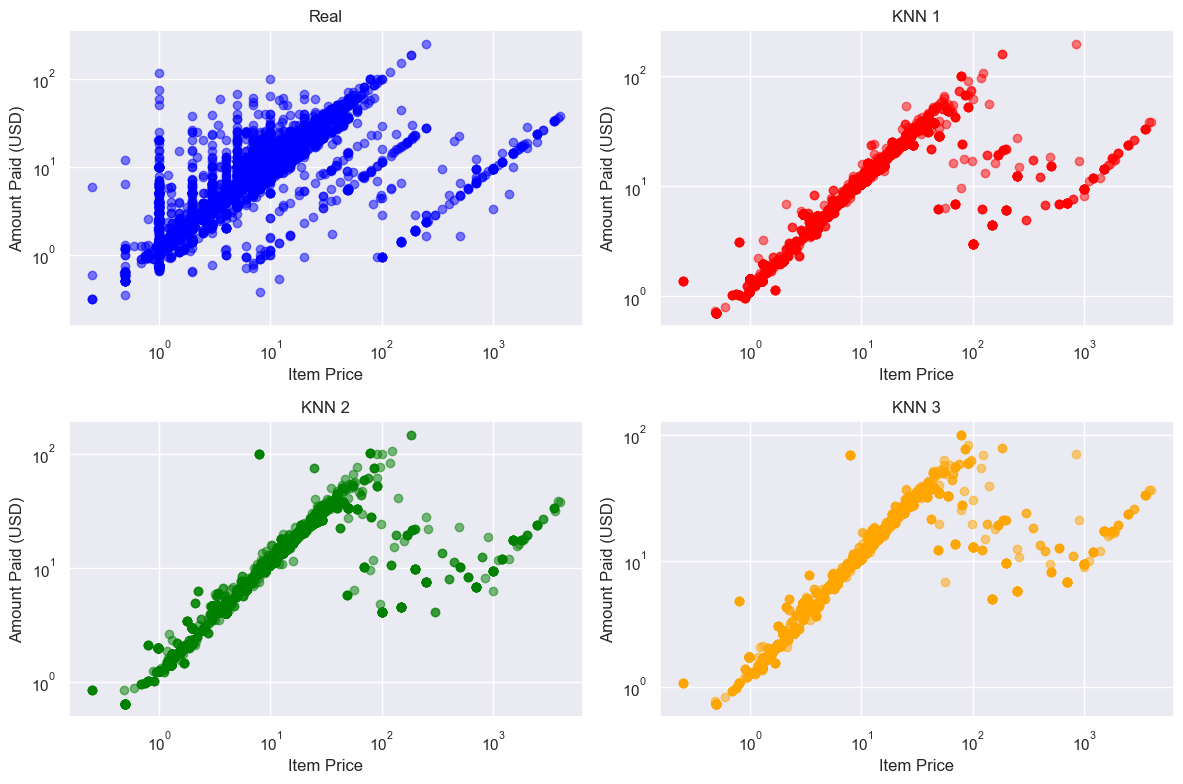

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].scatter(X_test, y_test, color='blue', alpha = 0.5, label='Actual')
axes[0, 0].set_xlabel('Item Price')
axes[0, 0].set_ylabel('Amount Paid (USD)')
axes[0, 0].set_title('Real')

axes[0, 1].scatter(X_test, y_pred1, color='red', alpha = 0.5, label='KNN 1')
axes[0, 1].set_xlabel('Item Price')
axes[0, 1].set_ylabel('Amount Paid (USD)')
axes[0, 1].set_title('KNN 1')

axes[1, 0].scatter(X_test, y_pred2, color='green', alpha = 0.5, label='KNN 2')
axes[1, 0].set_xlabel('Item Price')
axes[1, 0].set_ylabel('Amount Paid (USD)')
axes[1, 0].set_title('KNN 2')

axes[1, 1].scatter(X_test, y_pred3, color='orange', alpha = 0.5, label='KNN 3')
axes[1, 1].set_xlabel('Item Price')
axes[1, 1].set_ylabel('Amount Paid (USD)')
axes[1, 1].set_title('KNN 3')

axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


Podemos ver que los algoritmos KNN encuentran dos patrones. en items bajo $100, el precio pagado sube y baja casi en proporción 1:1 con el precio. Luego sobre desde ~$1000 hacia arriba, los precios pagados estan considerablemente más baratos que el valor real.
Estos son patrones visibles en el gráfico real, con claras líneas representando distintos porcentajes "redondos" de descuento como 25%, 50% y 75%. Y en KNN se establece la línea en un 90% de descuento

También podemos ver que los modelos hacen un mal trabajo de predecir cuando la gente paga más que el precio de lista, sin embargo podemos ver en el gráfico real que los objetos con el precio de lista entre $1 y $10 tienden a recibir más de lo pedido. mientras que en objetos desde los $100 esto no ocurre.

# p7.2: Graficos DT

Acá hacemos los gráficos de arbol de cada arbol de decisiones, cambiamos el tema para que sea legible el texto (negro contra blanco en vez de blanco contra blanco)

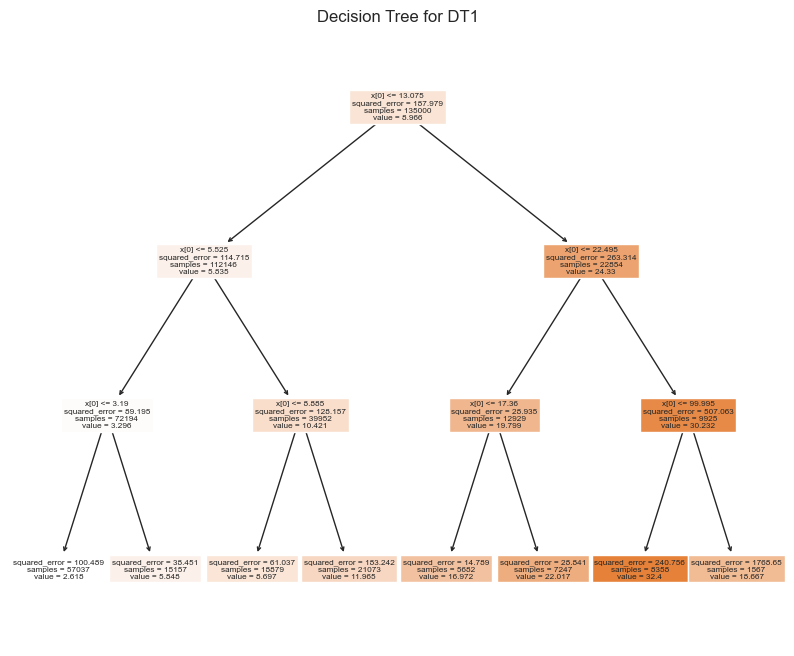

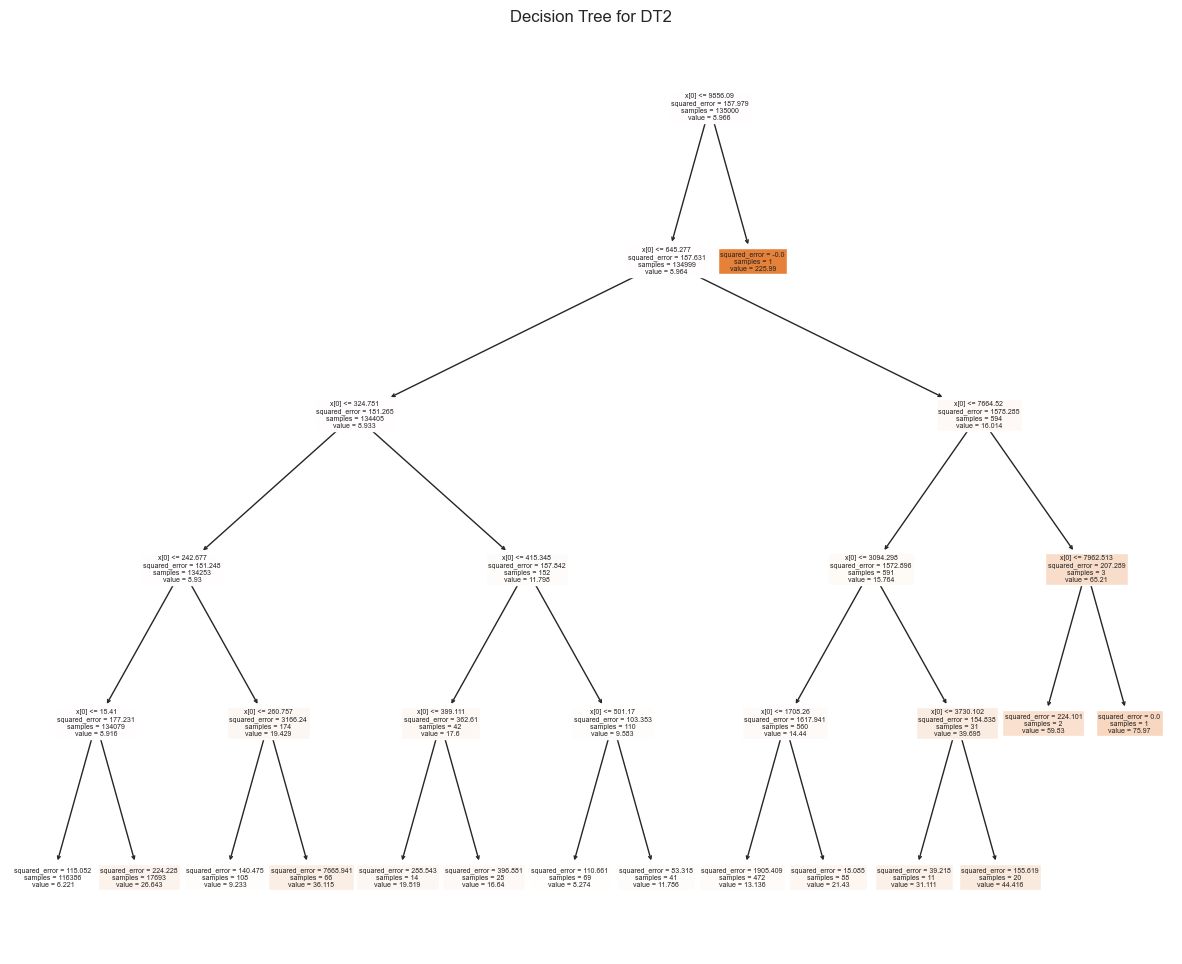

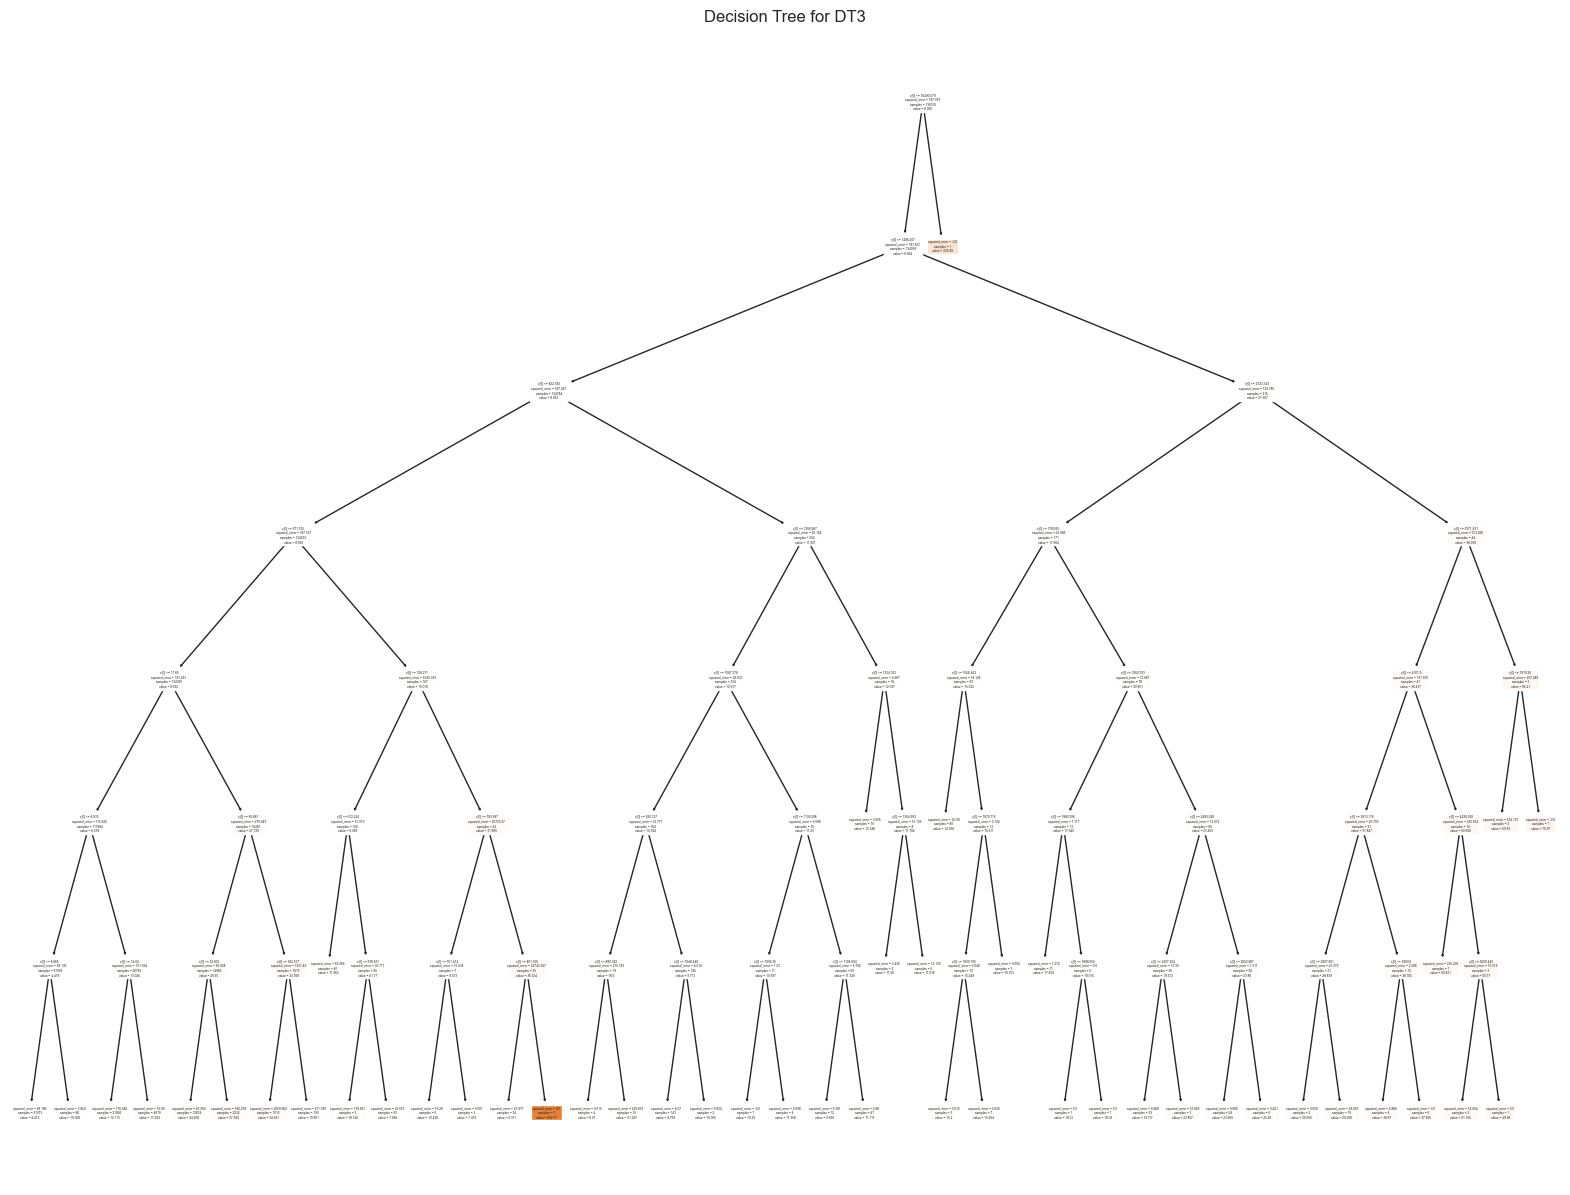

In [54]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf1, filled=True)
plt.title("Decision Tree for DT1")
plt.show()

plt.figure(figsize=(15, 12))
tree.plot_tree(clf2, filled=True)
plt.title("Decision Tree for DT2")
plt.show()

plt.figure(figsize=(20, 15))
tree.plot_tree(clf3, filled=True)
plt.title("Decision Tree for DT3")
plt.show()


Y ahora generamos los mismos gráficos de antes, para evaluar cómo DT predice en comparación con el gráfico real

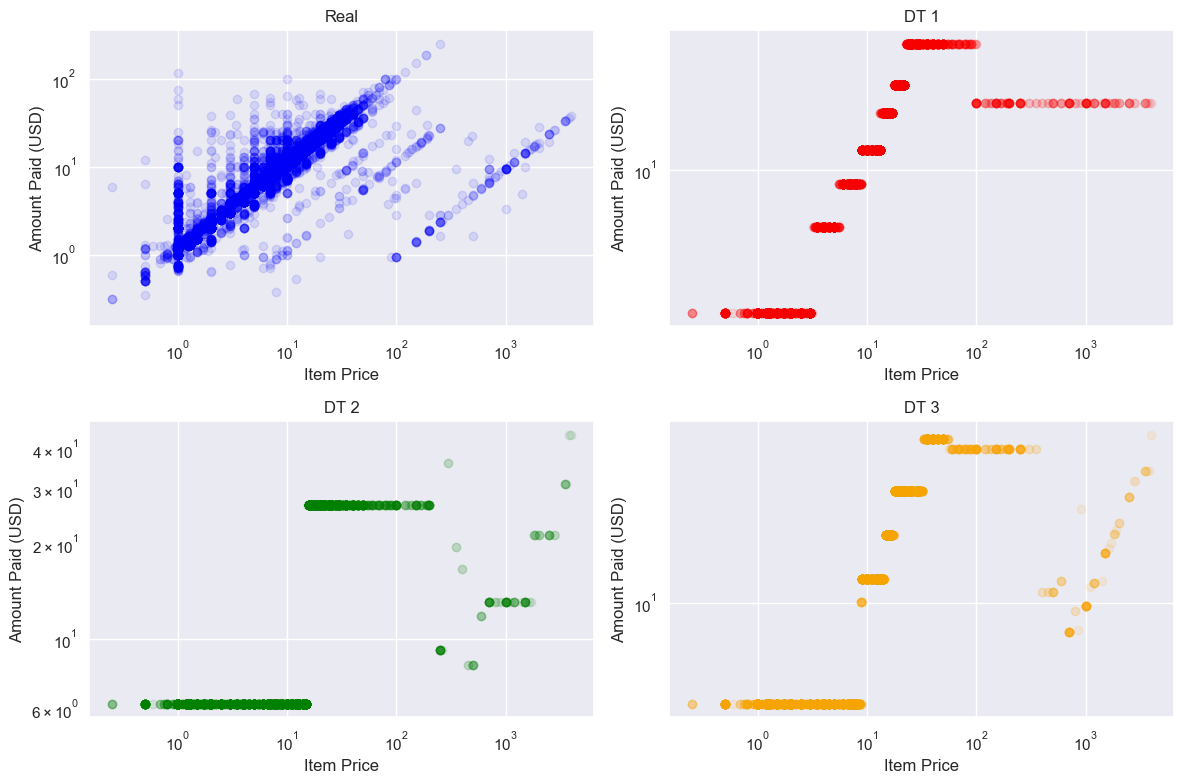

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].scatter(X_test, y_test, color='blue', alpha = 0.1, label='Actual')
axes[0, 0].set_xlabel('Item Price')
axes[0, 0].set_ylabel('Amount Paid (USD)')
axes[0, 0].set_title('Real')

axes[0, 1].scatter(X_test, y_pred4, color='red', alpha = 0.1, label='DT 1')
axes[0, 1].set_xlabel('Item Price')
axes[0, 1].set_ylabel('Amount Paid (USD)')
axes[0, 1].set_title('DT 1')

axes[1, 0].scatter(X_test, y_pred5, color='green', alpha = 0.1, label='DT 2')
axes[1, 0].set_xlabel('Item Price')
axes[1, 0].set_ylabel('Amount Paid (USD)')
axes[1, 0].set_title('DT 2')

axes[1, 1].scatter(X_test, y_pred6, color='orange', alpha = 0.1, label='DT 3')
axes[1, 1].set_xlabel('Item Price')
axes[1, 1].set_ylabel('Amount Paid (USD)')
axes[1, 1].set_title('DT 3')

axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


Acá se demuestra la debilidad de DT para su uso con nuestro set de datos. la forma de agrupar datos que utiliza DT no le permite seguir la forma continua y multiagrupada de los datos reales. Esto explica por que el predictor DT funciona tan mal con esta base de datos.

_________________
# Bonus: Clustering


sampleamos 15.000 datos, para que el clustering no explote.

In [118]:
df_sample = df.sample(n=15000, random_state=1)
X = df_sample['item_price'].values.reshape(-1, 1)
y = df_sample['amount_paid_usd'].values.reshape(-1, 1)
xy = df_sample[['item_price', 'amount_paid_usd']].values.reshape(-1, 2)

Definimos nuestros parámetros para DBScan.

In [128]:
gmm1 = GaussianMixture(n_components=3, random_state=1, covariance_type='diag')
gmm2 = GaussianMixture(n_components=4, random_state=2, covariance_type='diag')
gmm3 = GaussianMixture(n_components=5, random_state=3, covariance_type='diag')


Entrenamos nuestros modelos

In [129]:
gmm1.fit(xy)
gmm2.fit(xy)
gmm3.fit(xy)

GaussianMixture(covariance_type='diag', n_components=5, random_state=3)

Contamos cuantos clusters hay

In [130]:
num_clusters_gmm1 = gmm1.n_components
num_clusters_gmm2 = gmm2.n_components
num_clusters_gmm3 = gmm3.n_components

Imprimimos cuantos clusters se generaron

In [131]:

print(f"Number of clusters for Model 1: {num_clusters_gmm1}")
print(f"Number of clusters for Model 2: {num_clusters_gmm2}")
print(f"Number of clusters for Model 3: {num_clusters_gmm3}")

Number of clusters for Model 1: 3
Number of clusters for Model 2: 4
Number of clusters for Model 3: 5


Creamos labels para cada modelo, para así poder graficar.

In [132]:
labels_gmm1 = gmm1.predict(xy)
labels_gmm2 = gmm2.predict(xy)
labels_gmm3 = gmm3.predict(xy)

Graficamos en un grid de 4x4, con los datos reales para comparar

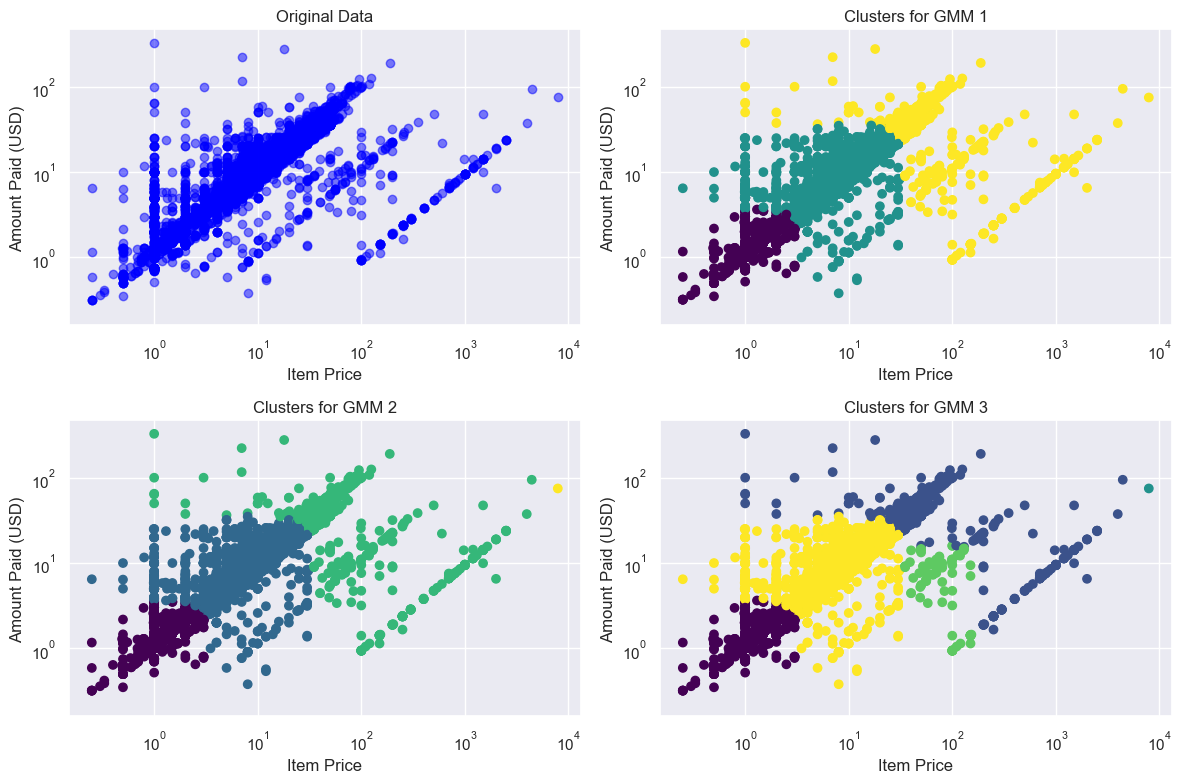

In [134]:
# Create a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Scatter plot for original data
axes[0, 0].scatter(X, y, color='blue', alpha=0.5)
axes[0, 0].set_xlabel('Item Price')
axes[0, 0].set_ylabel('Amount Paid (USD)')
axes[0, 0].set_title('Original Data')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')

# Scatter plot for GMM 1
axes[0, 1].scatter(X, y, c=labels_gmm1, cmap='viridis')
axes[0, 1].set_xlabel('Item Price')
axes[0, 1].set_ylabel('Amount Paid (USD)')
axes[0, 1].set_title('Clusters for GMM 1')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')

# Scatter plot for GMM 2
axes[1, 0].scatter(X, y, c=labels_gmm2, cmap='viridis')
axes[1, 0].set_xlabel('Item Price')
axes[1, 0].set_ylabel('Amount Paid (USD)')
axes[1, 0].set_title('Clusters for GMM 2')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')

# Scatter plot for GMM 3
axes[1, 1].scatter(X, y, c=labels_gmm3, cmap='viridis')
axes[1, 1].set_xlabel('Item Price')
axes[1, 1].set_ylabel('Amount Paid (USD)')
axes[1, 1].set_title('Clusters for GMM 3')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

plt.tight_layout()
